#  Music generate
Using audiocraft as the main function

## catalogs
### [Important](#Important)
### Music generate
####    - [Configuring the environment](#Configuring)
####    - [Active input](#Generate1)
####    - [Automatic input](#Generate2)
####    -  [Pick an description as the promot](#Pick)
### [Image creation](#Image)

## Important

# <font color='red'>That will use GPU with a lot RAM to run, at least 16.24GB GPU's RAM. so you might can not run with personal laptop</font>
So do I, i even failed when using Google colab and Kaggle Kernel'S server (even the pro version), so i have to pay money to someone online and just generate one output (Expensive!!)

## <font color='red'>! ! !</font>you should install ffmpeg in conda or your path first<font color='red'>! ! !</font>
### [ffmepg](https://www.gyan.dev/ffmpeg/builds/)(click here to find the file)

This is a model that simplifies and enhances music generation

- **Open a terminal or command prompt.**


- **Enter the commands I provided previously, starting with sudo apt-get install ffmpeg if you're on a Debian/Ubuntu system.**


- **Follow with the commands to install AudioCraft.**

## Then install audiocraft by <font color='red'>'pip install -U audiocraft'</font>

- That will need PyTorch with CUDA 12.1, click **[here](https://pytorch.org/get-started/locally/)** to download the proper version for your PC, or you can dierctly use:

<font color='red'>pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121</font> 

- Also need **[xformers](https://github.com/facebookresearch/xformers#installing-xformers)** to Accelerate Research on Transformers, or use:

<font color='red'>pip3 install -U xformers --index-url https://download.pytorch.org/whl/cu121</font> 

PyTorch with CUDA needs to use GPU on CUDA capabilities, some drivers on current is too old to run, so you also have to <font color='red'>! ! !</font>download a GPU driver.<font color='red'>! ! !</font>

[NIVIDA GeForce Game Ready Driver 546.01](https://www.nvidia.com/Download/index.aspx)

#### Configuring

In [1]:
import audiocraft

A matching Triton is not available, some optimizations will not be enabled.
Error caught was: No module named 'triton'


In [2]:
from audiocraft.models import musicgen
from audiocraft.utils.notebook import display_audio
import torch
import torchaudio
import os
import ipywidgets as widgets
from IPython.display import display

#### Generate1
#### Generate with the promots you input in the box provided

In [3]:
# Define the output directory
output_dir = r'C:\Users\24431\audiocraft'

# Load the pretrained MusicGen model
model = musicgen.MusicGen.get_pretrained('small', device='cuda')

# Set the generation parameters
model.set_generation_params(duration=30)

# Define a function to handle the generation
def generate_music(b):
    prompt = text_input.value
    res = model.generate(prompt)
    # Here you should add code to handle 'res', such as saving it or displaying it

# Create a text input widget
text_input = widgets.Textarea(
    value='Enter perfume description here...',
    placeholder='Type something',
    description='Prompt:',
    disabled=False
)

# Create a button and set its on-click event
generate_button = widgets.Button(description="Generate Music")
generate_button.on_click(generate_music)

# Display the widgets
display(text_input, generate_button)


E:\Program Files\miniconda\envs\stem\lib\site-packages\audiocraft\models\musicgen.py:116: UserWarning: MusicGen pretrained model relying on deprecated checkpoint mapping. Please use full pre-trained id instead: facebook/musicgen-small
  warnings.warn(
E:\Program Files\miniconda\envs\stem\lib\site-packages\torch\nn\utils\weight_norm.py:30: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Textarea(value='Enter perfume description here...', description='Prompt:', placeholder='Type something')

Button(description='Generate Music', style=ButtonStyle())

#### Generate2
#### Generate from the pre-setted promots

In [3]:
from audiocraft.models import musicgen
from audiocraft.utils.notebook import display_audio
import torch
import torchaudio
import os

# Define the output directory
output_dir = r'C:\Users\24431\audiocraft'

# Load the pretrained MusicGen model
model = musicgen.MusicGen.get_pretrained('small', device='cuda')

# Set the generation parameters
model.set_generation_params(duration=30)

# Generate music (additional parameters may be required for the generate method)
prompt = "A women's fragrance designed specifically for women of the era, it shows women's jumping and vitality, and is in line with the active yet charming personality of modern women. It is suitable for various activities and can enhance the lightness of complete relaxation.
"
res = model.generate(prompt)


E:\Program Files\miniconda\envs\stem\lib\site-packages\audiocraft\models\musicgen.py:116: UserWarning: MusicGen pretrained model relying on deprecated checkpoint mapping. Please use full pre-trained id instead: facebook/musicgen-small
  warnings.warn(
E:\Program Files\miniconda\envs\stem\lib\site-packages\torch\nn\utils\weight_norm.py:30: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


OutOfMemoryError: CUDA out of memory. Tried to allocate 3.55 GiB. GPU 0 has a total capacty of 6.00 GiB of which 0 bytes is free. Of the allocated memory 10.07 GiB is allocated by PyTorch, and 156.29 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

## Pick
## Pick an description as the promot

In [ ]:
!pip install openpyxl

In [4]:
import pandas as pd
from IPython.display import display

#### Clasify with 'Fragrance'

In [5]:
# Load the data from the provided Excel file
file_path = 'data/nosetime.xlsx'  # Replace with your file path
perfume_data = pd.read_excel(file_path)

# Calculate the count for each 'Fragrance' category
category_counts = perfume_data['Fragrance'].value_counts().rename('Count').reset_index()
category_counts.rename(columns={'index': 'Fragrance'}, inplace=True)

# Grouping the data by 'Fragrance' and selecting one 'Introduction' (description) per group
grouped_introductions = perfume_data.groupby('Fragrance')['Introduction'].first().reset_index()

# Merging the count with the grouped introductions
merged_data = pd.merge(grouped_introductions, category_counts, on='Fragrance')

# Reordering columns to display the count first
merged_data = merged_data[['Fragrance', 'Count', 'Introduction']]

# Display the resulting data as a table
display(merged_data)

,Fragrance,Count,Introduction
0,Aldehydic floral fragrance,144,Paris Bleu is a French perfume brand founded i...
1,Aromatic notes,286,Jehanne Rigaud Parfums is a perfume brand from...
2,Aromatic woody tone,702,"Lorenzo Siena was founded in New York in 2006,..."
3,Citrus,190,Biosea is a cosmetics brand from France.
4,Fantastic tune,324,"In 1988, Dior launched Fahrenheit, a sensual m..."
5,Floral,1722,Fragrance: fresh woody floral top note: Chines...
6,Floral Oriental,1189,Madonna Nudes 1979 is a brand registered globa...
7,Floral and fruity gourmet notes,425,"Katy Perry, Chinese name Katy Perry, Katy Perr..."
8,Floral chypre,402,"In 1984, perfumer Akiko Kamei created ""Parfume..."
9,Floral fruity fragrance,1,EXCITE is the fragrance from DOCUMENTS' third ...


#### Sorted with count

In [6]:
# Sorting the DataFrame by 'Count' in descending order
merged_data_sorted = merged_data.sort_values(by='Count', ascending=False)

# Reordering columns to display the count first
merged_data_sorted = merged_data_sorted[['Fragrance', 'Count', 'Introduction']]

# Display the resulting data as a table
display(merged_data_sorted)

,Fragrance,Count,Introduction
14,Fruity floral fragrance,1974,Marc Jacobs has been quite obsessed with perfu...
5,Floral,1722,Fragrance: fresh woody floral top note: Chines...
6,Floral Oriental,1189,Madonna Nudes 1979 is a brand registered globa...
27,Woody floral fragrance,806,Iceberg is a first-tier Italian brand owned by...
2,Aromatic woody tone,702,"Lorenzo Siena was founded in New York in 2006,..."
26,Woody Oriental,696,Dunhill is an international brand dominated by...
32,aromatic citrus,526,"Fresh fruity notes, lush rosemary, nutmeg and ..."
21,Oriental,519,Krizia Krazy Krizia is an oriental fragrance f...
7,Floral and fruity gourmet notes,425,"Katy Perry, Chinese name Katy Perry, Katy Perr..."
20,Green leafy floral fragrance,424,A women's fragrance designed specifically for ...


#### Randomly pick one description

In [8]:
from audiocraft.models import musicgen
from audiocraft.utils.notebook import display_audio

# Grouping the data by 'Fragrance' and selecting one 'Introduction' (description) per group
grouped_data = perfume_data.groupby('Fragrance')['Introduction'].first().reset_index()

# Randomly select three introductions
selected_introductions = grouped_data['Introduction'].sample(1)

# Display the selected introductions
print("Selected Introductions:")
for index, intro in enumerate(selected_introductions, start=1):
    print(f"{index}. {intro}\n")

Selected Introductions:
1. Adhis - a tribute to the imaginary world beyond the surface of the mirror. Based on the scent of aquatic and iridescent flowers, it combines warm, spicy and woody notes, evoking the ripples and stillness of a pond or mirror. A captivating fragrance that evokes reverie, with bright and vibrant top notes that gradually evolve into deeper notes of spices, damp earth and dry wood.



#### use the introduction as the promots to generate

In [ ]:
import random

# Load the pretrained MusicGen model
model = musicgen.MusicGen.get_pretrained('small', device='cuda')
model.set_generation_params(duration=30)

# Generate music for each selected introduction
for intro in selected_introductions:
    prompt = intro
    res = model.generate(prompt)
    # Here you can add code to play or save the generated music, e.g., display_audio(res)
    print(f"Generated music for: {prompt[:50]}...")  # Print a part of the prompt for reference

E:\Program Files\miniconda\envs\stem\lib\site-packages\audiocraft\models\musicgen.py:116: UserWarning: MusicGen pretrained model relying on deprecated checkpoint mapping. Please use full pre-trained id instead: facebook/musicgen-small
  warnings.warn(
E:\Program Files\miniconda\envs\stem\lib\site-packages\torch\nn\utils\weight_norm.py:30: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


#### Since i cant run this code on my personl laptop i will directly use the music generated yet to do the next steps.

## Image
## Using music to create images

In [ ]:
!pip install --upgrade matplotlib
!pip install SoundFile
!pip install librosa
!pip install numpy

In [1]:
import librosa
import soundfile as sf

# Load the FLAC file - Librosa loads the audio file as a floating point time series
# sr=None ensures the audio is loaded at its original sample rate
audio, sr = librosa.load('data/Benetton.flac', sr=None, duration=15.0)

# Write the first 15 seconds to a new FLAC file
sf.write('data/Benetton2.flac', audio, sr)


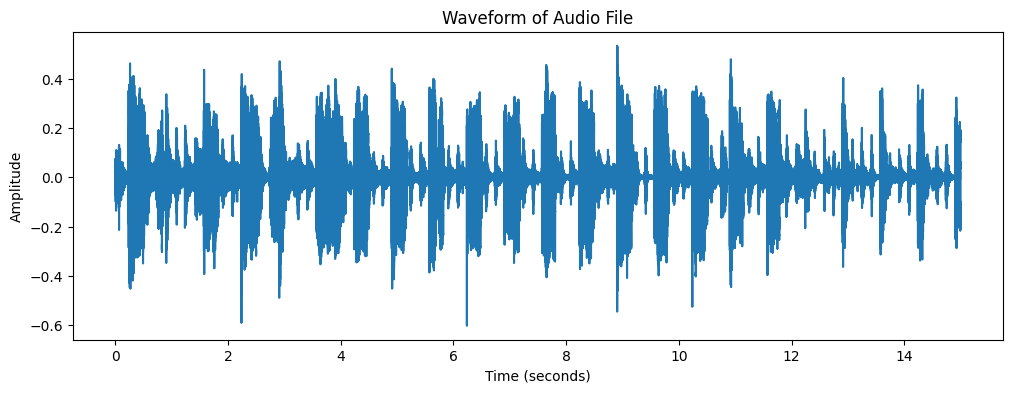

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Load the audio file
audio_file_path = 'data/Benetton2.flac'  # Replace with your file path
y, sr = librosa.load(audio_file_path)

# Create an array of timestamps
timestamps = np.arange(len(y)) / sr

# Plot the waveform
plt.figure(figsize=(12, 4))
plt.plot(timestamps, y)
plt.title('Waveform of Audio File')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()


In [3]:
def extract_audio_features(audio_file):
    y, sr = librosa.load(audio_file)
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
    rms_energy = librosa.feature.rms(y=y)[0]

    # Normalizing features for better visualization
    norm_centroids = spectral_centroids / np.max(spectral_centroids)
    norm_rms_energy = rms_energy / np.max(rms_energy)

    return tempo, norm_centroids, norm_rms_energy

audio_file = 'data/Benetton2.mp3'  # Replace with your audio file path
tempo, norm_centroids, norm_rms_energy = extract_audio_features(audio_file)


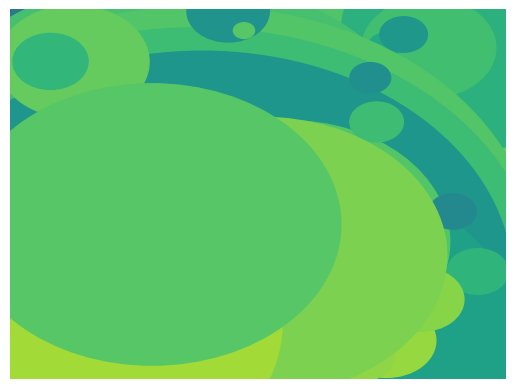

In [4]:
import matplotlib.patches as patches

def generate_shapes(tempo, norm_centroids, norm_rms_energy):
    fig, ax = plt.subplots()
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')

    num_shapes = len(norm_centroids)
    for i in range(num_shapes):
        # Properties influenced by music features
        x, y = np.random.rand(2)  # Random position
        size = norm_rms_energy[i]
        color = plt.cm.viridis(norm_centroids[i])  # Color mapped from centroids

        # Create a circle
        circle = patches.Circle((x, y), size, color=color, fill=True)
        ax.add_patch(circle)

    plt.savefig('abstract_shapes.png', dpi=300, bbox_inches='tight')
    plt.show()

generate_shapes(tempo, norm_centroids, norm_rms_energy)


,8
name,"Benetton Sport Women, 2001"
brand,benetton
Attributes,Female fragrance
image link,https://img.xssdcdn.com/perfume/908212.jpg
Introduction,A women's fragrance designed specifically for ...
Perfumer,NaN
Fragrance,Green leafy floral fragrance
main scent,"Orange, basil, bergamot, cedar, lily of the va..."
Main scent 1,tangerine
Main scent 2,basil


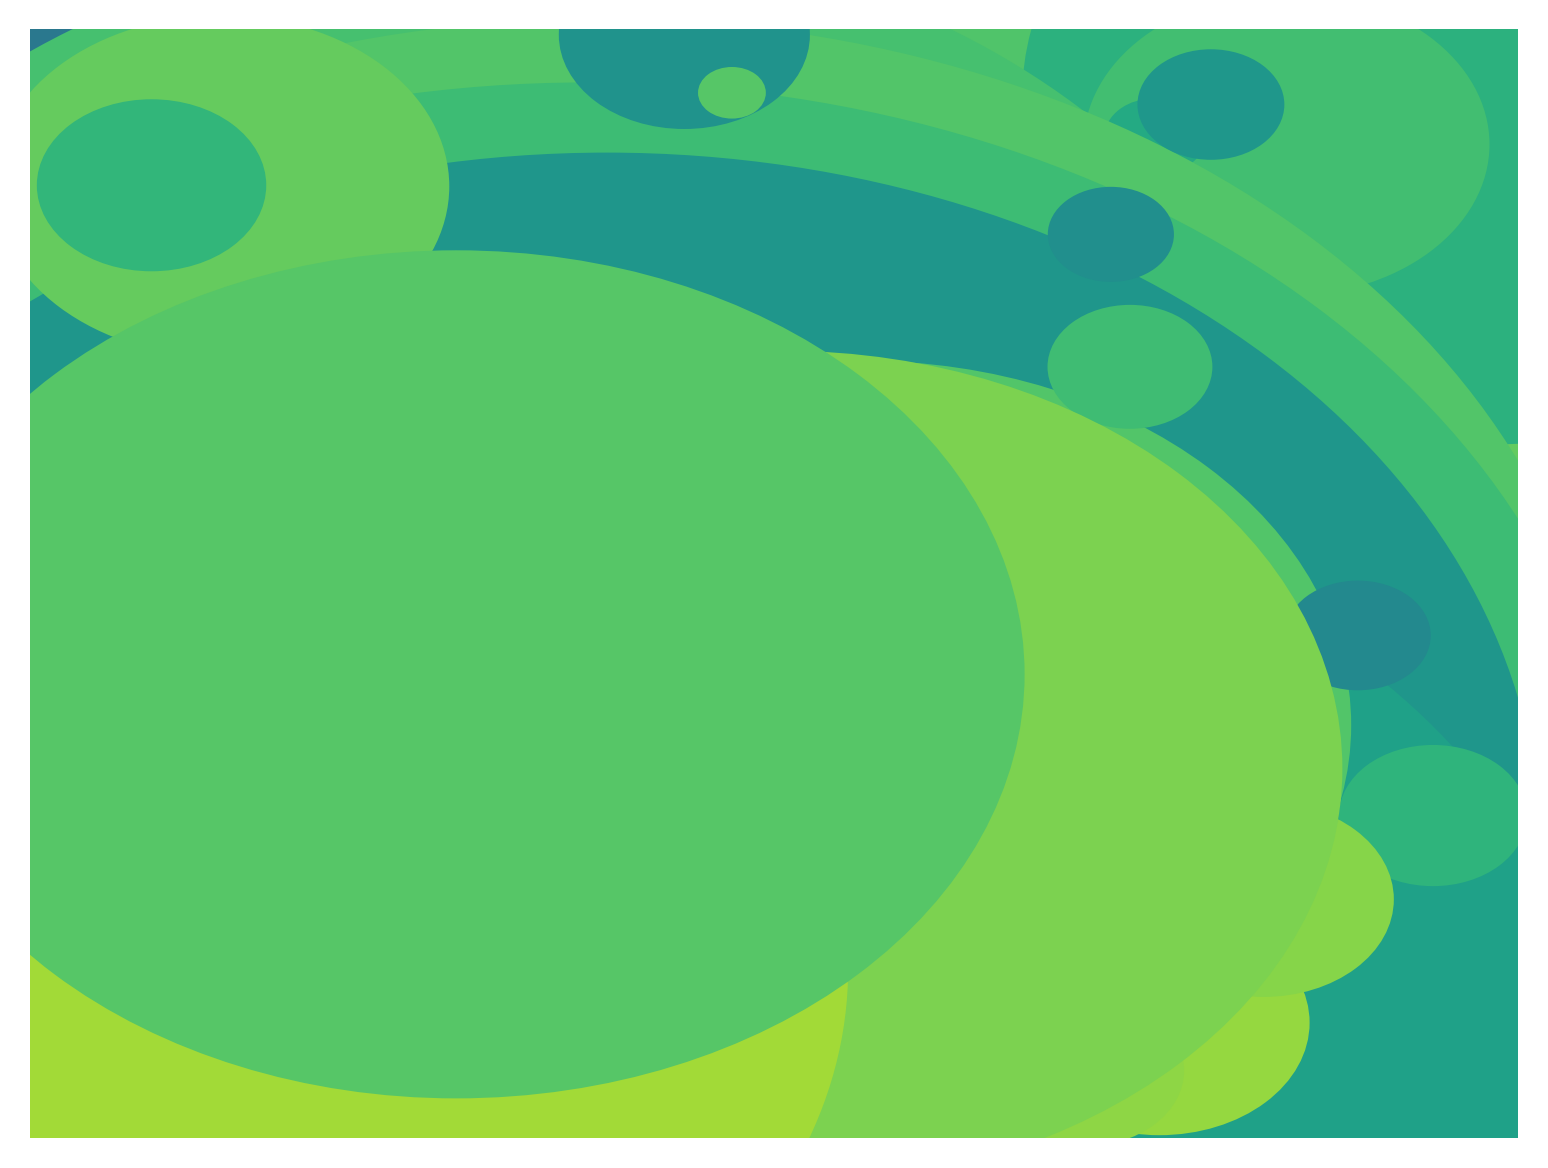

In [9]:
import pandas as pd
from IPython.display import display, Image, Audio

# Load the data
file_path = 'data/nosetime.xlsx'
perfume_data = pd.read_excel(file_path)

# Randomly select a perfume
selected_perfume = perfume_data.iloc[8]

# Display the perfume data
display(selected_perfume.to_frame())

# File paths
image_file = 'abstract_shapes.png'  # Replace with your image file path
music_file = 'data/Benetton2.mp3'  # Replace with your music file path

# Display the image
display(Image(filename=image_file))

# Embed and play the audio
audio_display = Audio(filename=music_file)
display(audio_display)


#### Output in a new window

In [10]:
import pandas as pd
import tkinter as tk
from tkinter import PhotoImage, Label, Text, Button
import webbrowser
import os

# Load the data from the Excel file
file_path = 'data/nosetime.xlsx'  # Replace with the path to your Excel file
perfume_data = pd.read_excel(file_path)

# Select the perfume at a specific row 
selected_perfume = perfume_data.iloc[8]

# Function to play music - this opens the default media player
def play_music(music_file):
    webbrowser.open(music_file)

# File paths
image_file = 'abstract_shapes.png'  # Replace with your image file path
music_file = 'data/Benetton2.mp3'  # Replace with your music file path

# Create the main window
root = tk.Tk()
root.title("Perfume Display")

# Display perfume data
text = Text(root, height=10, width=50)
perfume_info = "\n".join([f"{col}: {val}" for col, val in selected_perfume.items()])
text.insert(tk.END, perfume_info)
text.config(state=tk.DISABLED)
text.pack()

# Display the image
img = PhotoImage(file=image_file)
img_label = Label(root, image=img)
img_label.pack()

# Button to play music
play_button = Button(root, text="Play Music", command=lambda: play_music(music_file))
play_button.pack()

# Run the application
root.mainloop()


# Reference：

- Program： [Musicgen](https://huggingface.co/spaces/facebook/MusicGen)


- code：[audiocraft](https://github.com/facebookresearch/audiocraft/tree/main)


- research： [Simple and Controllable Music Generation](https://arxiv.org/abs/2306.05284)